# Proyecto 3: Predicción de precios de propiedades

¡Bienvenidos al tercer proyecto de la carrera de Data Science de Acamica! 

En este proyecto vamos a seguir trabajando con el dataset de propiedades en venta publicadas en el portal [Properati](www.properati.com.ar). El objetivo en este caso armar nuestros primeros modelos para predecir el precio de las propiedades en dólares.

Las columnas que se agregan son:

* `barrios_match`: si coincide el barrio publicado con el geográfico vale 1, si no 0.

* `PH`, `apartment`, `house`: variables binarias que indican el tipo de propiedad.

* dummies de barrios: variables binarias con 1 o 0 según el barrio.

La métrica que vamos a usar para medir es RMSE (raíz del error cuadrático medio), cuya fórmula es:

$$RMSE = \sqrt{\frac{\sum_{t=1}^n (\hat y_t - y_t)^2}{n}}$$

In [2]:
import pandas as pd
import numpy as np
pd.set_option('display.float_format', lambda x: '%.3f' % x)
path_dataset = '../data/datos_properati_limpios_model.csv'
df = pd.read_csv(path_dataset)
df.head()

,lat,lon,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,rooms,barrio_match,PH,apartment,house,...,VILLA LUGANO,VILLA LURO,VILLA ORTUZAR,VILLA PUEYRREDON,VILLA REAL,VILLA RIACHUELO,VILLA SANTA RITA,VILLA SOLDATI,VILLA URQUIZA,outlier_price_m2
0,-34.589,-58.417,170000.000,40.000,38.000,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,-34.591,-58.418,90000.000,27.000,27.000,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,-34.587,-58.437,150000.000,44.000,44.000,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,-34.593,-58.428,154000.000,58.000,58.000,2,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-34.593,-58.428,154000.000,58.000,58.000,3,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
print(path_dataset.format(df.shape[0]))

../data/datos_properati_limpios_model.csv


El objetivo de este proyecto es poder trabajar en el ajuste de modelos y su posterior evaluación.

Para empezar vamos a separar el `dataset` en un conjunto de entrenamiento (80%) y un conjunto de test (20%). 

**Separá el dataset** en `X_train`, `X_test`, `y_train` e `y_test` con el tamaño correspondiente

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X = df.drop(['price_aprox_usd'], axis=1)
y = df['price_aprox_usd']

# Realizá la separación a continuación en esta celda

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

## Árboles de decisión

Lo primero que vamos a hacer es entrenar un árbol de decisión y usar de métrica al `RMSE`. 

Para poder obtener el **RMSE** vamos a medir el `mean_squared_error` y obtener su raíz cuadrada. 

**Importá** `DecisionTreeRegressor` desde `sklearn.tree`.  

A continuación **entrená** el regresor con el conjunto de training


In [7]:
from sklearn.tree import DecisionTreeRegressor 
tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

Con el modelo entrenado **realizá la predicción** sobre el conjunto de test `X_test` y guardá el resultado en una variable `y_pred`.

In [8]:
# Acá realizá la predicción

y_pred = tree_reg.predict(X_test)

In [9]:
y_pred

array([ 77505.54,  89000.  ,  98100.  , ..., 165000.  , 154000.  ,
        87000.  ])

In [10]:
y_test.head()

6318    88900.000
3800   100000.000
3752    95900.000
1121    69900.000
993     83000.000
Name: price_aprox_usd, dtype: float64

**Calculá el rmse** sacando la raíz cuadrada de `mean_squared_error` entre `y_test` e `y_pred` y **mostrá** el resultado

In [11]:
# En esta celda calculá el rmse

from sklearn.metrics import mean_squared_error
import numpy as np
tree_mse = mean_squared_error(y_test, y_pred)
print("RMSE: ", np.sqrt(tree_mse))

RMSE:  25502.312814564288


__Analizar el cambio en el RMSE a medida que es más profundo el árbol de decisión, tanto en training como en testing.__

Para esto, **iterá** de 5 en 5 en el parámetro `max_depth` y **observá** como impacta en el RMSE. 

**Creá** dos arreglos `rmses_train` y `rmses_test` para ir guardando los **rmse** de cada profundidad

In [12]:
rmses_train = [] #array
rmses_test = []
for i in range (1,30,5): ## formula de programación de python for loops
   model = DecisionTreeRegressor(max_depth=i).fit(X_train, y_train)
   rmses_train.append(np.sqrt(mean_squared_error(model.predict(X_train), y_train)))
   rmses_test.append(np.sqrt(mean_squared_error(model.predict(X_test), y_test)))

Ahora graficamos los valores que guardamos en los arreglos `rmses_train` y `rmses_test`

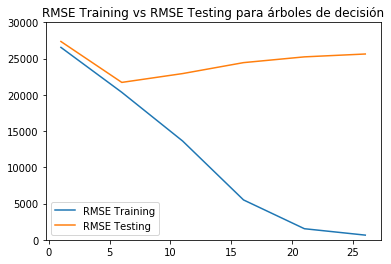

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline 
plt.plot(range(1,30, 5), rmses_train, label='RMSE Training')
plt.plot(range(1,30, 5), rmses_test, label='RMSE Testing')
plt.ylim((0, 30000))
plt.legend(loc="best")
plt.title("RMSE Training vs RMSE Testing para árboles de decisión")
plt.show()

Podemos ver aquí como el modelo presenta sobreajuste dado que a mayor complejidad (en este caso, mayor profundidad del árbol) más diferencia entre los resultados de training y testing. También observamos como la curva de testing decrece y luego vuelvo a crecer. El punto donde se minimiza está relacionado con el tradeoff entre sesgo y varianza que vamos a ver en la próxima unidad.

## KNN

**Entrená un knn** y nuevamente medir el **rmse** en el conjunto de testing


In [14]:
# Realizá el entrenamiento y el cálculo de rmse en esta celda

from sklearn.neighbors import KNeighborsRegressor    ##regresión  
from sklearn.preprocessing import StandardScaler  ##procesamiento de datos

In [15]:
normalizador = StandardScaler().fit(X_train)

E:\Anaconda\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


In [16]:
X_train_norm = normalizador.transform(X_train)


E:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


In [17]:
vecinos = 10

In [18]:
modelo = KNeighborsRegressor(n_neighbors= vecinos, weights='uniform')

In [19]:
modelo.fit(X_train_norm,y_train) 

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=10, p=2,
          weights='uniform')

In [20]:
X_test_norm = normalizador.transform(X_test)

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


In [21]:
y_pred_KNN = modelo.predict(X_test_norm)

In [22]:
y_pred_KNN

array([126700.   , 125774.381,  92510.   , ..., 105086.91 , 151600.   ,
       126977.7  ])

In [23]:
y_test.head()

6318    88900.000
3800   100000.000
3752    95900.000
1121    69900.000
993     83000.000
Name: price_aprox_usd, dtype: float64

In [24]:
tree_mseKNN = mean_squared_error(y_test, y_pred_KNN)
print("RMSE: ", np.sqrt(tree_mseKNN))

RMSE:  27859.57934785654


__Analizar el cambio en el RMSE a medida que consideramos más vecinos para KNN, tanto en training como en testing.__

Para esto, **iterá** incrementando de a uno el parámetro `n_neighbors` y **observá** como impacta en el RMSE. 

**Creá** dos arreglos `rmses_train` y `rmses_test` para ir guardando los **rmse** de cada profundidad

In [25]:
rmses_train = [] #array
rmses_test = []
for i in range (1,30,1): ## formula de programación de python for loops
   model = KNeighborsRegressor(n_neighbors=i).fit(X_train, y_train)
   rmses_train.append(np.sqrt(mean_squared_error(model.predict(X_train), y_train)))
   rmses_test.append(np.sqrt(mean_squared_error(model.predict(X_test), y_test)))

In [26]:
# Calculá los cambio en el rmse en esta celda

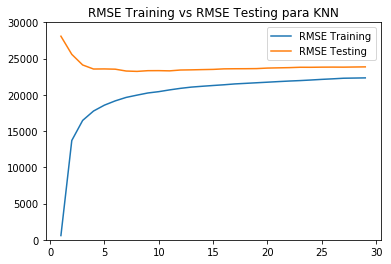

In [36]:
plt.plot(range(1,30, 1), rmses_train, label='RMSE Training')
plt.plot(range(1,30, 1), rmses_test, label='RMSE Testing')
plt.ylim((0, 30000))
plt.legend(loc="best")
plt.title("RMSE Training vs RMSE Testing para KNN")
plt.show()

**Calcular el RMSE promedio del resultado de cross validation para un árbol de decisión. 
Como parámetros deberás usar:**
- 10 folds = grupos
- profundidad 5
- scoring neg_mean_squared_error.

El árbol de decisión guardalo en una variable llamada `regressor` para poder reutilizarla luego.

Atención: `cross_validation_score` de `scikit-learn` usá la métrica `neg_mean_squared_error` (NMSE) en vez de `mean_square_error` (MSE). 

`NMSE` es lo mismo que `MSE` pero con un signo negativo. 

Como nosotros queremos obtener el `MSE` para calcular sobre él el `RMSE`, vamos a definir un método `nmsq2rmse` para hacer esa conversión de `NMSE` a `MSE`
.

In [41]:
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [42]:
def nmsq2rmse(score):   #def define función def nombre de fantasía (parametros): en línea de abajo
    return np.sqrt(-score)

In [43]:
# Calculá en esta celda los cross_val_score

from sklearn.model_selection import cross_val_score
from sklearn import metrics

scores = cross_val_score(regressor, X_train, y_train,
                             scoring="neg_mean_squared_error", cv=10)

rmse_scores = nmsq2rmse(scores)
print("Scores: ", rmse_scores)
print("Promedio: ", rmse_scores.mean())
print("Desvío estandar: ", rmse_scores.std())

Scores:  [25625.03205182 26240.38449544 28037.95950946 26113.0934806
 26942.224303   27283.71246656 25120.54922695 26794.05647412
 25771.51115372 25272.19826168]
Promedio:  26320.072142333374
Desvío estandar:  886.6543410947213


Para ver el resultado final, reentrenamos al regresor y mostramos en un dataframe la comparación entre los valores reales, los predichos y su diferencia

In [44]:
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
val_real = pd.Series(y_test.values)
val_pred = pd.Series(y_pred)

In [45]:
predicciones = pd.concat([val_real.rename('Valor real'),val_pred.rename('Valor Pred') ,abs(val_real-val_pred).rename('Dif(+/-)')] ,  axis=1)

In [46]:
predicciones.head(10)

,Valor real,Valor Pred,Dif(+/-)
0,88900.000,112500.000,23600.000
1,100000.000,90000.000,10000.000
2,95900.000,98100.000,2200.000
3,69900.000,72000.000,2100.000
4,83000.000,85000.000,2000.000
5,115000.000,120000.000,5000.000
6,98000.000,76000.000,22000.000
7,75000.000,65500.000,9500.000
8,119500.000,120000.000,500.000
9,179500.000,149000.000,30500.000
